In [1]:
import pandas as pd
import numpy as np
import struct
import gzip
import matplotlib.pyplot as plt

    
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [2]:
root_dir = "/home/stephanos/Downloads/courses/HackOnData-2017/Amazon/baby/"

reviews_file = root_dir + 'reviews_Baby.json.gz'
meta_file = root_dir + 'meta_Baby.json.gz'
rcnn_image_features = root_dir + 'rcnn_image_features.csv'
rcnn_image_features_resized = root_dir + 'rcnn_image_features_resized.csv'

In [3]:
reviews = getDF(reviews_file)
meta = getDF(meta_file)

In [4]:
img_feat = pd.read_csv(rcnn_image_features_resized)

In [5]:
img_feat

,asin,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,B007X64EKG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.429399,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.821456,5.219251,0.120819
1,B000A1ELMW,1.122768,0.000000,0.000000,0.000000,0.000000,0.000000,2.514104,0.000000,0.000000,...,0.000000,2.423971,0.000000,0.000557,0.000000,0.000000,0.000000,2.157165,4.932326,0.000000
2,B003953CUS,0.000000,1.989970,0.000000,0.000000,0.000000,0.000000,1.119017,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.124479,1.334983
3,B00415NIJA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.911995,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.075507
4,B00608N3PK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.774086,0.000000,0.000000,0.000000,0.739931,0.282007,1.235082
5,B00EWOOPXI,0.000000,0.000000,0.000000,0.000000,0.279954,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.535782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,B004V4ISBO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.378674,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,B00064ATVK,0.000000,1.930494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.086297,0.000000,0.000000,0.000000,0.000000,0.000000,0.600964,0.288226
8,B008MCX1H2,0.000000,1.204601,0.000000,0.000000,0.000000,0.000000,0.443854,0.881599,0.000000,...,0.000000,0.000000,0.638428,0.000000,0.000000,0.000000,0.000000,0.311544,2.472051,0.000000
9,B00CMCQMMY,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.548564,0.000000,0.448372,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.932648,0.000000


In [6]:
reviewsDF = reviews.set_index('asin').groupby(level = 0)['unixReviewTime','overall'].agg(np.average)
del reviews

In [7]:
meta = meta[['price','asin','title']].set_index('asin')

In [8]:
df = meta.merge(reviewsDF, how = 'inner', left_index = True, right_index = True).dropna(how = 'any')
df.head()

,price,title,unixReviewTime,overall
asin,,,,
0188399313,69.99,Lifefactory 4oz BPA Free Glass Baby Bottles - ...,1.369613e+09,5.000000
0188399518,15.95,Planetwise Flannel Wipes,1.382789e+09,3.500000
0188399399,10.95,Planetwise Wipe Pouch,1.365466e+09,5.000000
0316967297,109.95,Annas Dream Full Quilt with 2 Shams,1.371168e+09,4.500000
0615447279,16.95,Stop Pacifier Sucking without tears with Thumb...,1.348464e+09,4.333333


In [9]:
df['time'] = pd.to_datetime(df['unixReviewTime'], unit = 's')
df = df.drop('unixReviewTime',axis = 1)

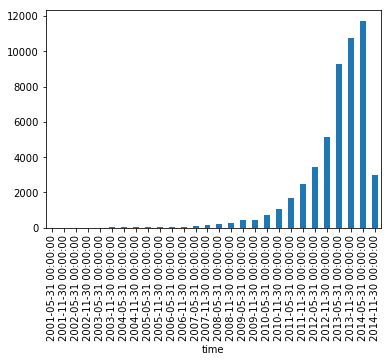

In [10]:
plt.figure()
df.set_index('time')['price'].groupby(pd.TimeGrouper(freq='6M')).count().plot(kind='bar')
plt.show()

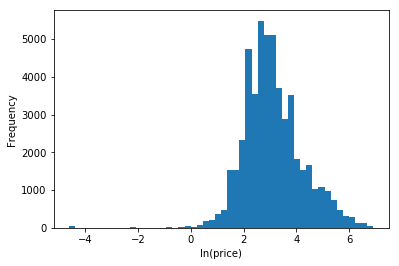

In [11]:
plt.figure()
np.log(df['price']).plot.hist(bins = 50,)
plt.xlabel('ln(price)')
plt.show()

In [11]:
df = df[df['time'] > '2013-01-01']
df.shape

(33378, 4)

In [12]:
import nltk
#nltk.download()
from nltk.collocations import *
from nltk.corpus import stopwords
words = nltk.word_tokenize(' '.join(df['title']))
print(len(words))
stopset = set(stopwords.words('english'))
bigram_measures = nltk.collocations.BigramAssocMeasures()
filtered_words = [w for w in words if not w in stopwords.words('english')]
print(len(filtered_words))

360191
344911


In [14]:
import string
filtered_words = [x for x in filtered_words if x not in string.punctuation]
print(len(filtered_words))

293700


In [15]:
finder = BigramCollocationFinder.from_words(filtered_words)
finder.nbest(bigram_measures.raw_freq, 20)

[('Bedding', 'Set'),
 ('Car', 'Seat'),
 ('Diaper', 'Bag'),
 ('2', 'Pack'),
 ('Carter', "'s"),
 ('Crib', 'Bedding'),
 ('Jojo', 'Designs'),
 ('Sweet', 'Jojo'),
 ('Cloth', 'Diaper'),
 ('Summer', 'Infant'),
 ('One', 'Size'),
 ('BPA', 'Free'),
 ('Safety', '1st'),
 ('Changing', 'Pad'),
 ('Crib', 'Sheet'),
 ('Lambs', 'amp'),
 ('amp', 'Ivy'),
 ('3', 'Pack'),
 ('Gift', 'Set'),
 ('4', 'Piece')]

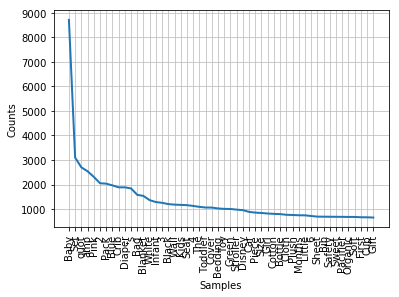

In [16]:
word_fd = nltk.FreqDist(filtered_words)
word_fd.plot(50,cumulative=False)

In [17]:
words_only = [w for w in filtered_words if w.isalpha()]
unique = set([w.lower() for w in words_only])
len(unique)

13978

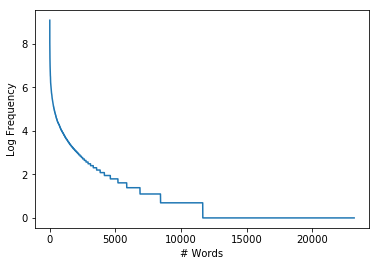

In [18]:
word_fd = nltk.FreqDist(filtered_words)
plt.figure()
plt.plot(list(range(len(word_fd))),np.log(sorted(word_fd.values(),reverse = True)))
plt.xlabel('# Words')
plt.ylabel('Log Frequency')
plt.show()

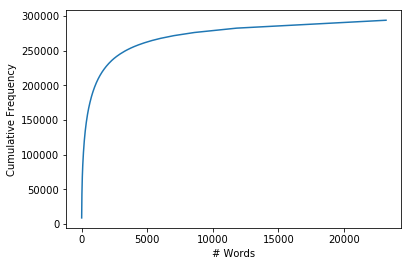

In [19]:
word_fd = nltk.FreqDist(filtered_words)
plt.figure()
plt.plot(list(range(len(word_fd))),np.array(sorted(word_fd.values(),reverse = True)).cumsum())
plt.xlabel('# Words')
plt.ylabel('Cumulative Frequency')
plt.show()

In [13]:
df = img_feat.set_index('asin').merge(df, how = 'inner', left_index = True, right_index = True).dropna(how = 'any')

In [14]:
price = df['price']
rating = df['overall']
df = df.drop(['price','overall','time'],axis = 1)

In [15]:
del img_feat

In [16]:
df.shape

(33378, 4097)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
countvect = CountVectorizer(analyzer = 'word', tokenizer = nltk.word_tokenize
                , stop_words = 'english', min_df=5, binary=True)

In [19]:
title_counts = countvect.fit_transform(df['title'])

from collections import defaultdict

d = defaultdict(set)
for w in countvect.vocabulary_:
    c = title_counts[:,countvect.vocabulary_.get(w)].count_nonzero()
    d[c].add(w)

[(k,len(v)) for k,v in sorted(d.items())]

[(5, 574),
 (6, 478),
 (7, 413),
 (8, 263),
 (9, 252),
 (10, 218),
 (11, 203),
 (12, 165),
 (13, 138),
 (14, 118),
 (15, 122),
 (16, 83),
 (17, 89),
 (18, 86),
 (19, 77),
 (20, 75),
 (21, 73),
 (22, 55),
 (23, 48),
 (24, 67),
 (25, 61),
 (26, 50),
 (27, 49),
 (28, 42),
 (29, 30),
 (30, 42),
 (31, 30),
 (32, 32),
 (33, 33),
 (34, 39),
 (35, 24),
 (36, 28),
 (37, 32),
 (38, 23),
 (39, 32),
 (40, 17),
 (41, 34),
 (42, 20),
 (43, 16),
 (44, 24),
 (45, 13),
 (46, 17),
 (47, 15),
 (48, 19),
 (49, 29),
 (50, 6),
 (51, 15),
 (52, 20),
 (53, 11),
 (54, 17),
 (55, 11),
 (56, 18),
 (57, 17),
 (58, 8),
 (59, 15),
 (60, 11),
 (61, 10),
 (62, 11),
 (63, 15),
 (64, 10),
 (65, 10),
 (66, 8),
 (67, 13),
 (68, 10),
 (69, 8),
 (70, 6),
 (71, 11),
 (72, 11),
 (73, 11),
 (74, 8),
 (75, 9),
 (76, 8),
 (77, 14),
 (78, 9),
 (79, 10),
 (80, 10),
 (81, 12),
 (82, 12),
 (83, 2),
 (84, 11),
 (85, 7),
 (86, 7),
 (87, 4),
 (88, 3),
 (89, 6),
 (90, 5),
 (91, 7),
 (92, 7),
 (93, 5),
 (94, 4),
 (95, 7),
 (96, 6),
 (97

In [32]:
countvect.fit_transform(df['title']).toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'count_nonzeros'

In [34]:
from scipy.sparse import hstack
allFeatures = hstack((df.drop('title',axis = 1).values, countvect.fit_transform(df['title']) )).toarray()

In [36]:
allFeatures.shape


(33378, 9400)

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(allFeatures, price, test_size = 0.2, random_state = 1)

In [38]:
gb = GradientBoostingRegressor(random_state = 1, n_estimators = 100)
param_grid = {'learning_rate': [0.01, 0.1, 0.3],
             'max_depth': [7]}

#0.05 0.08
#10


In [ ]:
gs = GridSearchCV(estimator = gb, param_grid = param_grid, scoring = 'r2', cv = 3, n_jobs = 4, verbose = 10).fit(X_train, y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] learning_rate=0.01, max_depth=7 .................................
[CV] learning_rate=0.01, max_depth=7 .................................
[CV] learning_rate=0.01, max_depth=7 .................................
[CV] learning_rate=0.1, max_depth=7 ..................................
[CV] ... learning_rate=0.1, max_depth=7, score=0.512798, total=38.1min
[CV] learning_rate=0.1, max_depth=7 ..................................
[CV] .. learning_rate=0.01, max_depth=7, score=0.351887, total=45.6min
[CV] learning_rate=0.1, max_depth=7 ..................................
[CV] .. learning_rate=0.01, max_depth=7, score=0.357887, total=45.8min
[CV] learning_rate=0.3, max_depth=7 ..................................


[Parallel(n_jobs=4)]: Done   3 out of   9 | elapsed: 45.9min remaining: 91.8min


[CV] .. learning_rate=0.01, max_depth=7, score=0.361162, total=46.7min
[CV] learning_rate=0.3, max_depth=7 ..................................


[Parallel(n_jobs=4)]: Done   4 out of   9 | elapsed: 46.9min remaining: 58.6min


[CV] ... learning_rate=0.1, max_depth=7, score=0.486881, total=37.7min
[CV] learning_rate=0.3, max_depth=7 ..................................


[Parallel(n_jobs=4)]: Done   5 out of   9 | elapsed: 76.1min remaining: 60.8min


[CV] ... learning_rate=0.3, max_depth=7, score=0.459171, total=33.6min


[Parallel(n_jobs=4)]: Done   6 out of   9 | elapsed: 79.5min remaining: 39.8min


[CV] ... learning_rate=0.3, max_depth=7, score=0.434054, total=34.0min


[Parallel(n_jobs=4)]: Done   7 out of   9 | elapsed: 80.9min remaining: 23.1min


[CV] ... learning_rate=0.1, max_depth=7, score=0.503045, total=37.1min
[CV] ... learning_rate=0.3, max_depth=7, score=0.457423, total=25.8min


[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed: 101.8min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed: 101.8min finished


In [64]:
import pickle
pickle.dump(gs, open('gsgd','wb'))

In [65]:
gs = pickle.load(open('gsgd','rb'))

In [67]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,566.670623,0.114586,2.786318e-01,3.243149e-01,0.01,3,"{'learning_rate': 0.01, 'max_depth': 3}",6,2.746436e-01,3.206852e-01,2.756077e-01,3.257986e-01,2.856449e-01,3.264610e-01,0.880525,7.364516e-03,0.004974,0.002581
1,986.255134,0.119795,3.309793e-01,4.812772e-01,0.01,5,"{'learning_rate': 0.01, 'max_depth': 5}",5,3.311018e-01,4.812723e-01,3.247332e-01,4.761615e-01,3.371035e-01,4.863977e-01,1.923422,7.367271e-03,0.005051,0.004179
2,1485.886665,0.145834,3.545946e-01,5.994504e-01,0.01,7,"{'learning_rate': 0.01, 'max_depth': 7}",4,3.550735e-01,6.018290e-01,3.471884e-01,5.952919e-01,3.615226e-01,6.012302e-01,7.834503,7.365808e-03,0.005862,0.002951
3,562.740034,0.114584,4.494290e-01,6.398482e-01,0.1,3,"{'learning_rate': 0.1, 'max_depth': 3}",3,4.584442e-01,6.370217e-01,4.378416e-01,6.420067e-01,4.520016e-01,6.405162e-01,0.943872,7.366033e-03,0.008606,0.002089
4,989.149054,0.139613,4.848307e-01,8.158985e-01,0.1,5,"{'learning_rate': 0.1, 'max_depth': 5}",2,4.922831e-01,8.141078e-01,4.711908e-01,8.157892e-01,4.910190e-01,8.177984e-01,0.990014,1.433218e-03,0.009659,0.001509
5,1452.639853,0.145834,4.886593e-01,9.063788e-01,0.1,7,"{'learning_rate': 0.1, 'max_depth': 7}",1,4.976960e-01,9.064331e-01,4.791010e-01,9.076069e-01,4.891809e-01,9.050965e-01,4.112546,7.365639e-03,0.007600,0.001026
6,565.015646,0.120319,1.792066e-02,8.619998e-01,1,3,"{'learning_rate': 1, 'max_depth': 3}",7,4.932588e-02,8.617218e-01,-3.529163e-02,8.642543e-01,3.973017e-02,8.600232e-01,0.675001,7.765183e-03,0.037831,0.001738
7,970.525649,0.140625,-1.198566e-01,9.623524e-01,1,5,"{'learning_rate': 1, 'max_depth': 5}",8,-1.098837e-01,9.611571e-01,-1.242398e-01,9.622157e-01,-1.254470e-01,9.636842e-01,0.890323,3.893359e-07,0.007069,0.001036
8,1368.443473,0.145834,-1.649937e-01,9.907511e-01,1,7,"{'learning_rate': 1, 'max_depth': 7}",9,-1.382360e-01,9.904348e-01,-2.061176e-01,9.913164e-01,-1.506260e-01,9.905020e-01,5.178201,7.365527e-03,0.029516,0.000401
9,563.856970,0.104178,-1.796564e+190,-1.918447e+190,10,3,"{'learning_rate': 10, 'max_depth': 3}",10,-1.592175e+190,-1.868740e+190,-1.839157e+190,-1.942958e+190,-1.958380e+190,-1.943643e+190,1.106056,7.351815e-03,inf,inf
